In [1]:
import glob
import json
from os.path import exists
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

GRQC = 'CA-GrQc'                    # small
ASTROPH = 'ca-AstroPh'              # medium
YOUTUBE = 'com-youtube.ungraph'     # large
EMAILCORE = 'email-Eu-core'         # directed
SPARCE_ROADS = 'roadNet-PA'         # sparce

# available algorithms
BRUTE_FORCE = "Brute Force"
NODE_ITERATOR = "Node Iterator"
COMPACT_FORWARD = "Compact Forward"
TRIEST = "Triest"
DOULION = "Doulion"

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
    

In [2]:
datasets = [GRQC, ASTROPH, YOUTUBE, SPARCE_ROADS]
algorithms =  [BRUTE_FORCE, NODE_ITERATOR, COMPACT_FORWARD]

allresults = {}

for dataset in datasets:
    allresults[dataset] = {}
    
    for alg in algorithms:
        
        file_path = f'../results/{dataset}_alg-{alg}_doulion-True_*.json'
        file_path = glob.glob(file_path)
    
        if len(file_path) == 1:
        
            with open(file_path[0], 'r') as file:
                data = json.load(file)
                args = dotdict(data['args'])
                
                allresults[dataset]['t'] = args.numOfTriangles
                for k, list_of_values in data['results'].items():
                    if k == 'Doulion runtime':
                        allresults[dataset][f'{k}_{alg}'] = list_of_values
                    else:
                        allresults[dataset][k] = list_of_values
    

allresults

{'CA-GrQc': {'t': 48260,
  'Doulion runtime_Brute Force': [0.013953208923339844,
   0.022837162017822266,
   0.01296544075012207,
   0.0249176025390625,
   0.0129547119140625,
   0.012956380844116211,
   0.01395106315612793,
   0.012938737869262695,
   0.022924423217773438],
  'Brute Force runtime': [39.528422355651855,
   149.27729105949402,
   274.00571060180664,
   424.19507002830505,
   547.8208410739899,
   660.3170092105865,
   791.745078086853,
   892.1310067176819,
   996.4932458400726],
  'Estimated Triangles': [34999,
   52499,
   45740,
   48828,
   46920,
   48625,
   49618,
   48503,
   48628],
  'Accuracy': [72.52382925818482,
   91.21425611272278,
   94.77981918926795,
   98.82278284293413,
   97.22337339411521,
   99.24368006630749,
   97.18591835526469,
   99.49459956485705,
   99.23692936693506],
  'Doulion runtime_Node Iterator': [0.014018058776855469,
   0.014838218688964844,
   0.01592254638671875,
   0.014807701110839844,
   0.01478719711303711,
   0.0136470794677

C:\Users\karal\AppData\Local\Temp\ipykernel_14032\1095119614.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt.style.library['seaborn-white'])


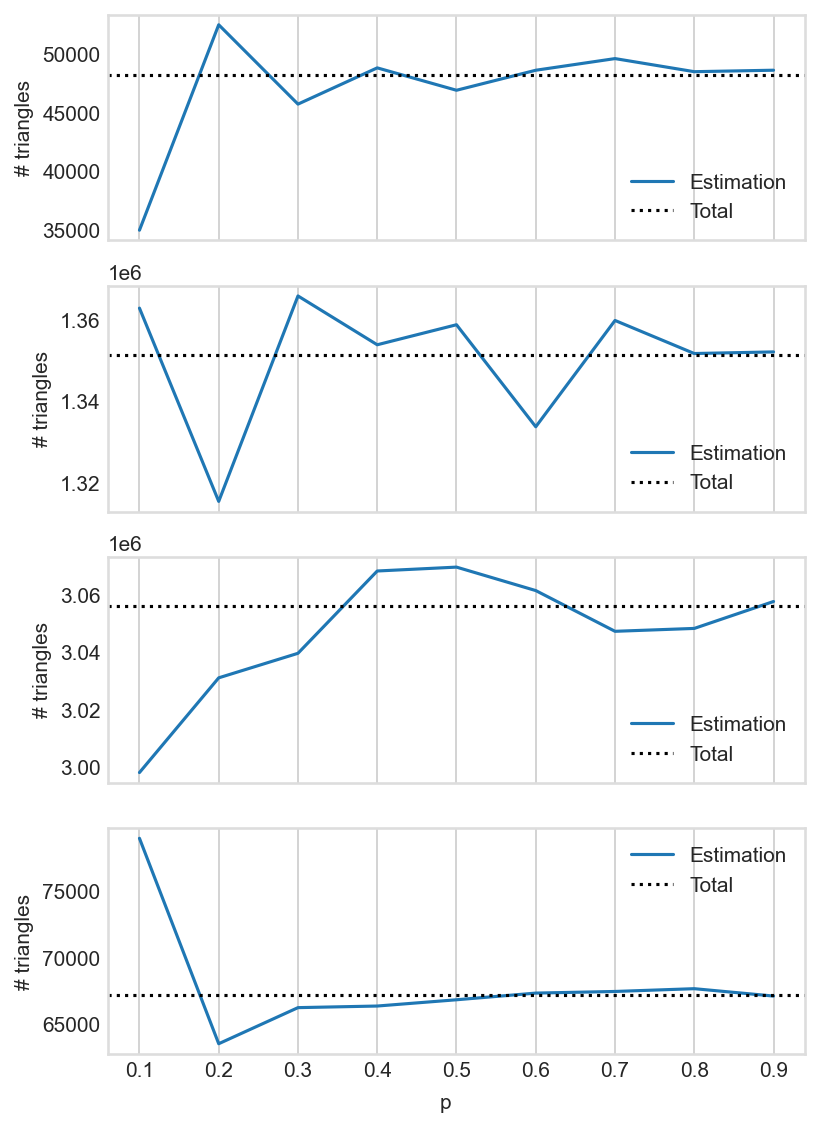

In [3]:
font = {'size'   : 10}
plt.rc('font', **font)

def estimated_triangles_plot():
    plt.style.use(plt.style.library['seaborn-white'])
    
    plt.rcParams['figure.dpi']= 150
    fig, axs = plt.subplots(nrows=len(datasets), ncols=1, figsize=(6, 9), squeeze=True, sharex='col')
    fig.text(0.5, 0.07, 'p', ha='center')
    x = np.arange(0.1, 1, 0.1)

    for i, (dataset, values) in enumerate(allresults.items()):
            ground_truth = allresults[dataset]['t']
            estimated = allresults[dataset]['Estimated Triangles']
            
            axs[i].plot(x, estimated, label='Estimation')
            axs[i].axhline(y=ground_truth, color='black', linestyle='dotted', label='Total')
            
            axs[i].set_xticks(x)
            axs[i].set(ylabel='# triangles')
            axs[i].legend()
            axs[i].grid(axis='x')
            
            for spine in ['bottom', 'top', 'right', 'left']:
                axs[i].spines[spine].set_color('#dddddd')
    

    plt.savefig('estimation.png', dpi=300)
    plt.show()
    
    
estimated_triangles_plot()    

C:\Users\karal\AppData\Local\Temp\ipykernel_10220\1261819250.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt.style.library['seaborn-white'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is ca

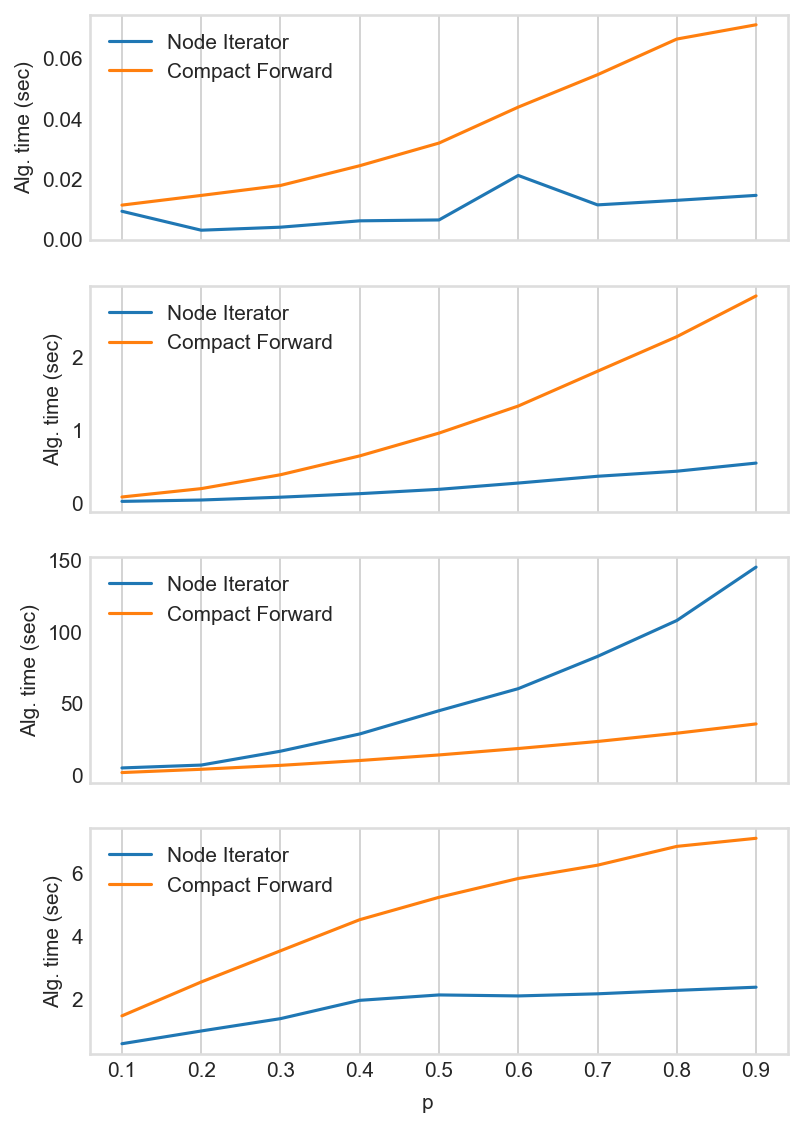

In [70]:
font = {'size'   : 10}
plt.rc('font', **font)

def runtime_plot():
    plt.style.use(plt.style.library['seaborn-white'])
    
    
    plt.rcParams['figure.dpi']= 150
    fig, axs = plt.subplots(nrows=len(datasets), ncols=1, figsize=(6, 9), squeeze=True, sharex='col')
    fig.text(0.5, 0.07, 'p', ha='center')
    x = np.arange(0.1, 1, 0.1)

    for i, (dataset, values) in enumerate(allresults.items()):
            
        for alg in algorithms:
            key = f'{alg} runtime'
            if key in allresults[dataset] and alg != BRUTE_FORCE:
                
                runtime = allresults[dataset][key]
            
                axs[i].plot(x, runtime, label=alg)
            
                axs[i].set_xticks(x)
                axs[i].set(ylabel='Alg. time (sec)')
            axs[i].legend()
            axs[i].grid(axis='x')
                
            for spine in ['bottom', 'top', 'right', 'left']:
                axs[i].spines[spine].set_color('#dddddd')
    

    plt.savefig('runtime.png', dpi=300)
    plt.show()
    
    
runtime_plot() 

C:\Users\karal\AppData\Local\Temp\ipykernel_10220\2380777215.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt.style.library['seaborn-white'])


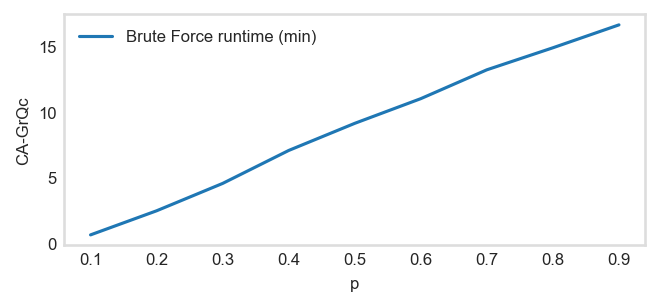

In [47]:
font = {'size'   : 8}
plt.rc('font', **font)

def plot_brute():
    plt.style.use(plt.style.library['seaborn-white'])
    
    
    plt.rcParams['figure.dpi']= 150
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 2), squeeze=True, sharex='col')
    x = np.arange(0.1, 1, 0.1)

    for i, (dataset, values) in enumerate(allresults.items()):
            
        for alg in algorithms:
            key = f'{alg} runtime'
            if key in allresults[dataset] and alg == BRUTE_FORCE:
                
                runtime = allresults[dataset][key]
                runtime = [i / 60 for i in runtime]
            
                axs.plot(x, runtime, label=f"{alg} runtime (min)")
            
                axs.set_xticks(x)
                axs.set(ylabel=dataset, xlabel='p')
                axs.legend()
                # axs[i].grid(axis='y')
                
                for spine in ['bottom', 'top', 'right', 'left']:
                    axs.spines[spine].set_color('#dddddd')
    

    # plt.savefig('bert base freeze.png', dpi=300)
    plt.show()
    
    
plot_brute() 

In [96]:

doulion_runtime = []

for dataset in datasets:
    
    for alg in algorithms:
        key = f'Doulion runtime_{alg}' 
        if key in allresults[dataset]:
            
            rt = {
                'dataset' : dataset,
                'alg': alg
            }
            for p, t in zip(np.arange(0.1,1,0.1), allresults[dataset][key]):
                rt[round(p, 2)] = t
            
            doulion_runtime.append(rt)


doulion_runtime = pd.DataFrame(doulion_runtime).drop(['alg'], axis=1)

doulion_runtime.groupby(['dataset']).mean()


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
dataset,,,,,,,,,
CA-GrQc,0.014296,0.016877,0.014613,0.018741,0.013937,0.013788,0.017019,0.013197,0.016408
ca-AstroPh,0.142435,0.167576,0.148325,0.155258,0.143298,0.144228,0.139214,0.134885,0.139964
com-youtube.ungraph,7.355456,5.674620,5.345847,5.717387,5.499511,5.784493,5.693980,5.208466,5.060991
roadNet-PA,3.312057,3.649250,3.716664,3.847343,4.101752,3.615740,3.520745,3.616563,3.569042


In [97]:
doulion_runtime.groupby(['dataset']).mean().T.describe()

dataset,CA-GrQc,ca-AstroPh,com-youtube.ungraph,roadNet-PA
count,9.000000,9.000000,9.000000,9.000000
mean,0.015431,0.146132,5.704528,3.661017
std,0.001884,0.009910,0.667461,0.219697
min,0.013197,0.134885,5.060991,3.312057
25%,0.013937,0.139964,5.345847,3.569042
50%,0.014613,0.143298,5.674620,3.616563
75%,0.016877,0.148325,5.717387,3.716664
max,0.018741,0.167576,7.355456,4.101752


In [4]:

datasets = [GRQC, ASTROPH, YOUTUBE, SPARCE_ROADS]

allresults = []

for dataset in datasets:
    
    file_path = f'../results/{dataset}_alg-{TRIEST}_doulion-False_*.json'
    file_path = glob.glob(file_path)
    
    if len(file_path) > 1:
        for i, file in enumerate( file_path ):
            
            with open(file, 'r') as file:
                data = json.load(file)
                args = dotdict(data['args'])
                
                rt = {
                    'dataset' : dataset,
                    'i' : i,
                    't' : args.numOfTriangles,
                    'memory': args.apprParamValues
                }
                
                for k, list_of_values in data['results'].items():
                    rt[k] = list_of_values
                
                allresults.append(rt)
    

allresults = pd.DataFrame(allresults)
allresults

,dataset,i,t,memory,Triest runtime,Estimated Triangles,Accuracy
0,CA-GrQc,0,48260,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.03987431526184082, 0.04285836219787598, 0.0...","[46934, 42649, 47214, 49622, 50761, 49383, 485...","[97.25298129044917, 88.3742596629853, 97.83404..."
1,CA-GrQc,1,48260,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.03786754608154297, 0.054811716079711914, 0....","[49544, 46127, 45639, 46777, 48040, 49712, 483...","[97.33903976915167, 95.58067855519138, 94.5691..."
2,CA-GrQc,2,48260,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.03788423538208008, 0.041849374771118164, 0....","[53352, 46135, 48531, 46885, 46687, 48120, 479...","[89.4479411280323, 95.59773388144552, 99.43836..."
3,CA-GrQc,3,48260,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.03786826133728027, 0.04086923599243164, 0.0...","[52703, 49941, 48687, 47201, 50394, 48110, 474...","[90.7934243816963, 96.51495868012744, 99.11405..."
4,CA-GrQc,4,48260,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.038869380950927734, 0.04087233543395996, 0....","[47184, 48860, 50759, 46550, 47385, 49074, 480...","[97.77188152512227, 98.75620629523213, 94.8209..."
5,ca-AstroPh,0,1351441,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.6525888442993164, 0.6860661506652832, 0.685...","[1262678, 1247063, 1418277, 1391193, 1328810, ...","[93.43204542581017, 92.27654261833578, 95.0544..."
6,ca-AstroPh,1,1351441,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.6210856437683105, 0.6409106254577637, 0.641...","[1389049, 1567577, 1315927, 1466856, 1346251, ...","[97.21714353632746, 84.00697274041089, 97.3721..."
7,ca-AstroPh,2,1351441,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.7004861831665039, 0.6839151382446289, 0.656...","[1359571, 1689962, 1336120, 1366363, 1373380, ...","[99.398407722965, 74.95110764912137, 98.866368..."
8,ca-AstroPh,3,1351441,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.6303963661193848, 0.6537814140319824, 0.654...","[1388449, 1349898, 1314372, 1416845, 1282061, ...","[97.2615669925346, 99.8858771134486, 97.257109..."
9,ca-AstroPh,4,1351441,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[0.615941047668457, 0.6488335132598877, 0.6777...","[1196679, 1159672, 1437758, 1380927, 1355152, ...","[88.54842646790665, 85.81003645829941, 93.6129..."


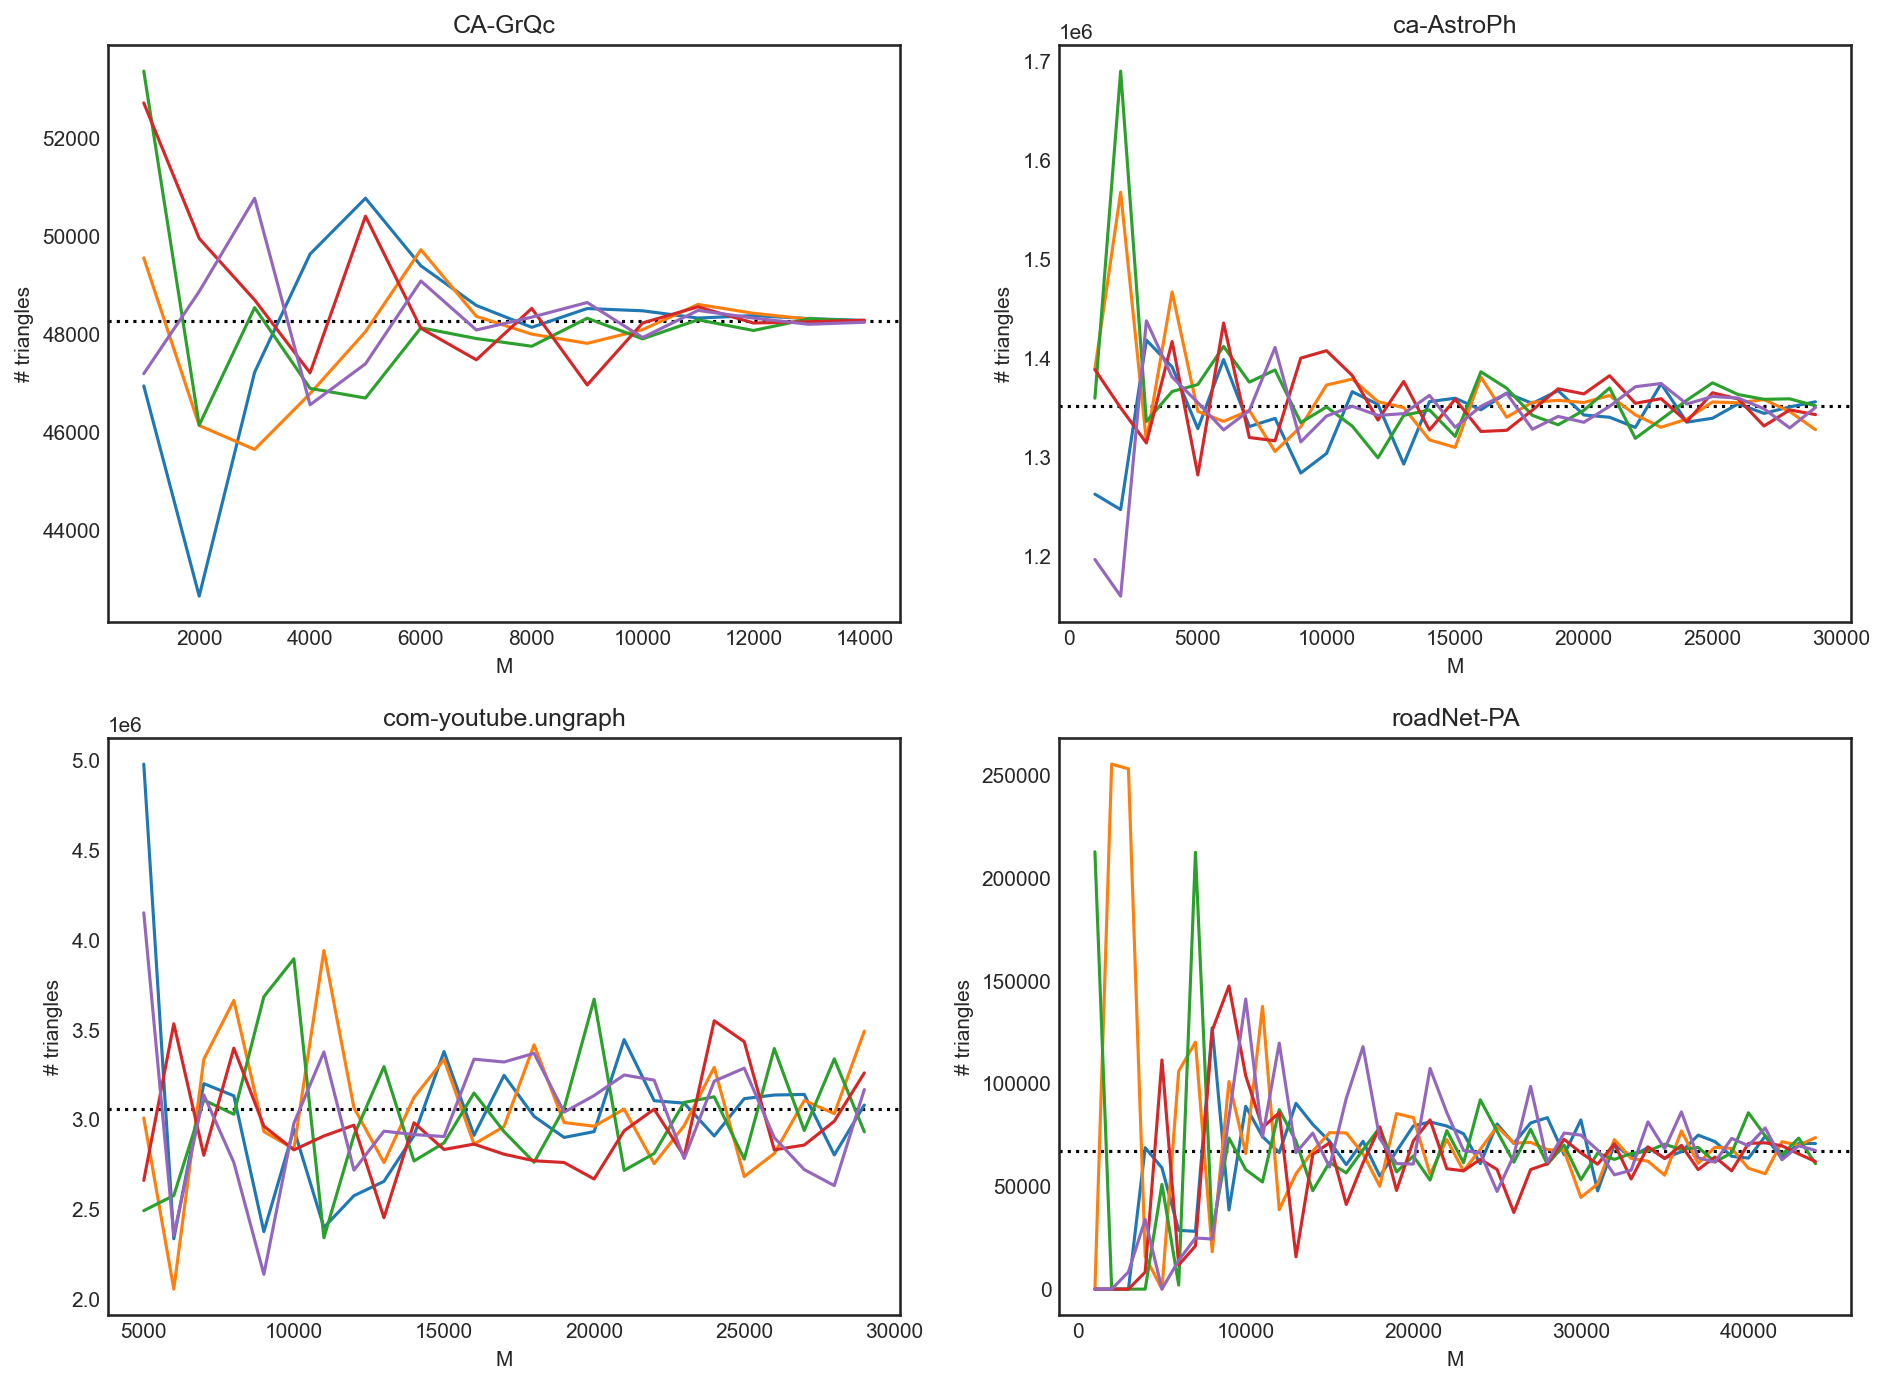

In [5]:
fig, axs = plt.subplots(2, 2, sharex=False, figsize=(15, 11))
for dataset, (i,j) in zip(datasets, [(0,0),(0,1),(1,0),(1,1)]):
    
    datasetdf = allresults[allresults['dataset'] == dataset]
    memory = [int(i) for i in next(iter(datasetdf['memory']))]
    ds = {}
    
    
    for c in ['Triest runtime', 'Estimated Triangles', 'Accuracy']:
        if c != 'Estimated Triangles': 
            continue
            
        ground_truth = allresults[allresults['dataset']==dataset]['t'].iloc[0]
        axs[i,j].axhline(y=ground_truth, color='black', linestyle='dotted')
        
        ds[c] = datasetdf[c].tolist()
        ds[c] = pd.DataFrame(ds[c], columns=memory)
        
        #print(c)
        #print(ds[c])
        print()
        
        for _, row in ds[c].iterrows():
            axs[i,j].plot(row)
            axs[i,j].title.set_text(dataset)
        
for ax in axs.flat:
    ax.set(xlabel='M', ylabel='# triangles')
plt.savefig(f'variance.png', dpi=300)

plt.show()
    
    

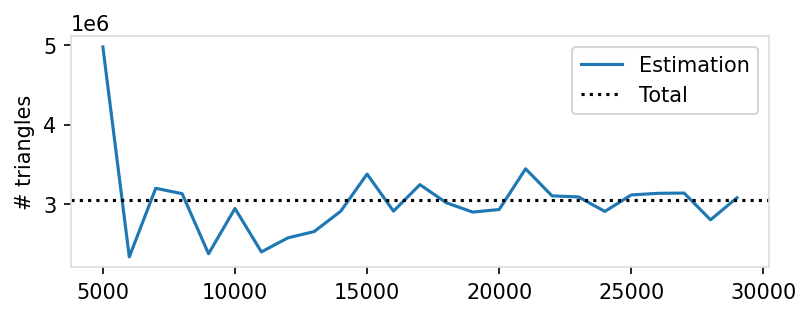

In [7]:
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams['figure.dpi']= 150

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), squeeze=True, sharex='col')


c = ['Triest runtime', 'Estimated Triangles', 'Accuracy']
c = 'Estimated Triangles'

dataset = YOUTUBE

datasetdf = allresults[allresults['dataset'] == dataset]
memory = [int(i) for i in next(iter(datasetdf['memory']))]
ground_truth = next(iter(datasetdf['t']))

ds = {}
        
ds[c] = datasetdf[c].tolist()
ds[c] = pd.DataFrame(ds[c], columns=memory)
            
axs.plot(ds[c].iloc[0], label='Estimation')
axs.axhline(y=ground_truth, color='black', linestyle='dotted', label='Total')


for spine in ['bottom', 'top', 'right', 'left']:
    axs.spines[spine].set_color('#dddddd')

axs.set(ylabel = '# triangles')
plt.legend()

# plt.savefig(f'Tiriest {dataset} {c}.png', dpi=300)

plt.show()
    




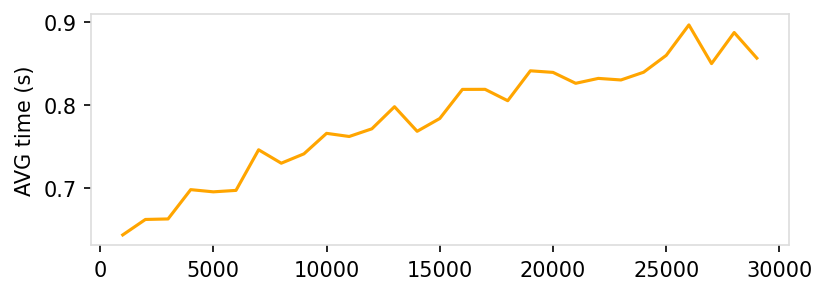

In [8]:
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams['figure.dpi']= 150

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), squeeze=True, sharex='col')


c = ['Triest runtime', 'Estimated Triangles', 'Accuracy']
c = 'Triest runtime'

dataset = ASTROPH

datasetdf = allresults[allresults['dataset'] == dataset]
memory = [int(i) for i in next(iter(datasetdf['memory']))]
ground_truth = next(iter(datasetdf['t']))

ds = {}
        
ds[c] = datasetdf[c].tolist()
ds[c] = pd.DataFrame(ds[c], columns=memory)
            
axs.plot(ds[c].mean(), color='orange')
# axs.axhline(y=ground_truth, color='black', linestyle='dotted', label='Total')


for spine in ['bottom', 'top', 'right', 'left']:
    axs.spines[spine].set_color('#dddddd')

axs.set(ylabel = 'AVG time (s)')

plt.savefig(f'Tiriest {dataset} {c}.png', dpi=300)

plt.show()
    



com-youtube.ungraph
25000
0    98.087259
1    87.716245
2    90.895654
3    87.705479
4    92.529004
Name: 25000, dtype: float64
count     5.000000
mean     91.386728
std       4.285647
min      87.705479
25%      87.716245
50%      90.895654
75%      92.529004
max      98.087259
Name: 25000, dtype: float64


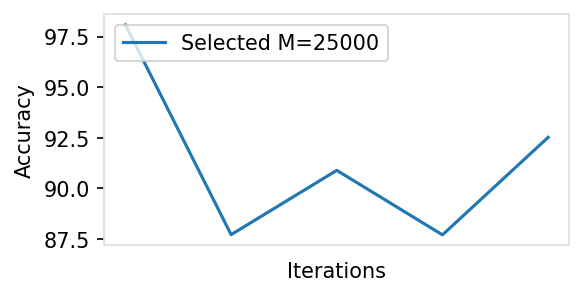

com-youtube.ungraph
25000
0    98.087259
1    87.716245
2    90.895654
3    87.705479
4    92.529004
Name: 25000, dtype: float64
count     5.000000
mean     91.386728
std       4.285647
min      87.705479
25%      87.716245
50%      90.895654
75%      92.529004
max      98.087259
Name: 25000, dtype: float64


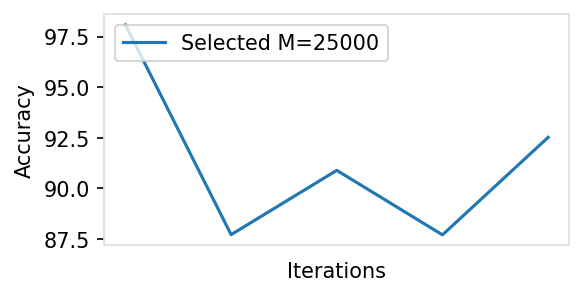

com-youtube.ungraph
25000
0    98.087259
1    87.716245
2    90.895654
3    87.705479
4    92.529004
Name: 25000, dtype: float64
count     5.000000
mean     91.386728
std       4.285647
min      87.705479
25%      87.716245
50%      90.895654
75%      92.529004
max      98.087259
Name: 25000, dtype: float64


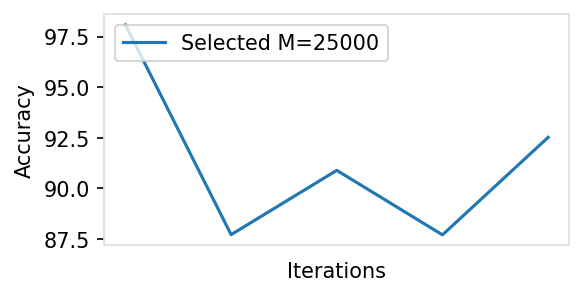

com-youtube.ungraph
25000
0    98.087259
1    87.716245
2    90.895654
3    87.705479
4    92.529004
Name: 25000, dtype: float64
count     5.000000
mean     91.386728
std       4.285647
min      87.705479
25%      87.716245
50%      90.895654
75%      92.529004
max      98.087259
Name: 25000, dtype: float64


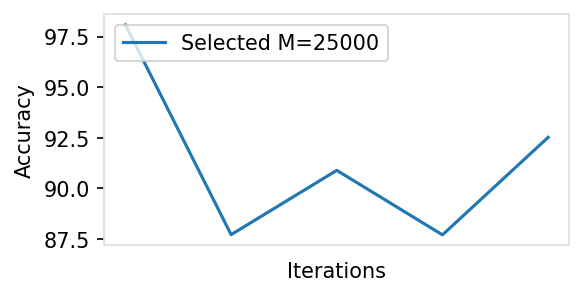

In [23]:
import seaborn as sns

font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams['figure.dpi']= 150


c = ['Triest runtime', 'Estimated Triangles', 'Accuracy']
c = 'Estimated Triangles'

for dataset in datasets:
    dataset = YOUTUBE
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 2), squeeze=True, sharex='col')

    ds = {}
    datasetdf = allresults[allresults['dataset'] == dataset]

    memory = [int(i) for i in next(iter(datasetdf['memory']))]
    ground_truth = next(iter(datasetdf['t']))
    ds['Accuracy'] = datasetdf['Accuracy'].tolist()
    ds['Accuracy'] = pd.DataFrame(ds['Accuracy'], columns=memory)
    max_memory = 25000 #ds['Accuracy'].mean().idxmax()

    c = 'Accuracy'
    ds[c] = datasetdf[c].tolist()
    ds[c] = pd.DataFrame(ds[c], columns=memory)
    max_memory_col = ds[c][max_memory]   
    
    print(dataset)
    print(max_memory)
    print(max_memory_col)
    print(max_memory_col.describe())
    
    axs.plot(max_memory_col)
    plt.xticks([])
    
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend([f'Selected M={max_memory}'], loc='upper left')
    
    for spine in ['bottom', 'top', 'right', 'left']:
        axs.spines[spine].set_color('#dddddd')
    
    plt.savefig(f'Acc {dataset} {max_memory}.png', dpi=300)
    
    plt.show()



    